**EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import cv2

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
import missingno


# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**UNDERSTANDING AND MANAGING THE DATA**

In [5]:
df = pd.read_excel('/content/iris data set.xlsx')
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [10]:
df.columns.values.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [13]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [14]:
df.isnull().sum().sort_values(ascending = False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [18]:
df.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [19]:
df.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [20]:
df.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

**VISUALIZING THE DATA**

In [24]:
figg = px.histogram(data_frame=ds, x='species', title='total no of species', color='species')

figg.show()

In [25]:
def Histogram(column):
    global ds

    # Create a histogram using plotly.graph_objects
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=ds[column], marker_color='skyblue', marker_line_color='black', marker_line_width=1.5))

    fig.update_layout(title=f'Histogram of {column}',
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      template='plotly_dark')

    fig.show()

In [26]:
Histogram('sepal_length')

In [27]:
Histogram('petal_length')

In [28]:
Histogram('sepal_width')

In [29]:
Histogram('petal_width')

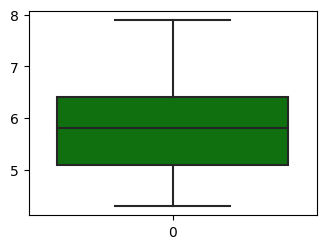

In [31]:
plt.subplot(2,2,1)
sns.boxplot(ds['sepal_length'],color='green')

plt.tight_layout()
plt.show()

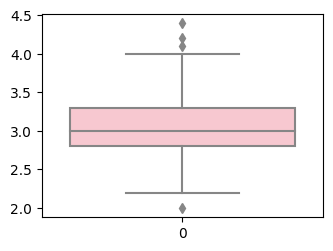

In [32]:
plt.subplot(2,2,2)
sns.boxplot(ds['sepal_width'],color='pink')

plt.tight_layout()
plt.show()

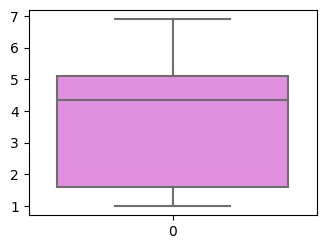

In [33]:
plt.subplot(2,2,3)
sns.boxplot(ds['petal_length'],color='violet')

plt.tight_layout()
plt.show()

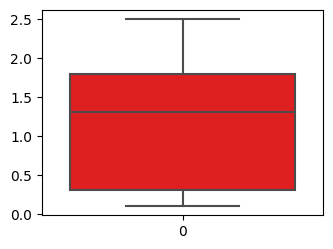

In [34]:
plt.subplot(2,2,4)
sns.boxplot(ds['petal_width'],color='red')

plt.tight_layout()
plt.show()

In [35]:
fig1 = px.histogram(ds, x="species", color="sepal_length")
fig1.show()

In [36]:
fig2 = px.histogram(ds, x="species", color="sepal_width")
fig2.show()

In [37]:
fig3 = px.histogram(ds, x="species", color="petal_width")
fig3.show()

In [38]:
fig4= px.histogram(ds, x="species", color="petal_length")
fig4.show()

In [39]:
def Scatterplot(x, y, c=None):
    global ds

    plt.figure(figsize=(15, 6))
    for species in ds['species'].unique():
        plt.scatter(ds[x][ds['species'] == species], ds[y][ds['species'] == species], label=species, edgecolor="k", alpha=0.7)
    plt.xticks(rotation=0)

    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

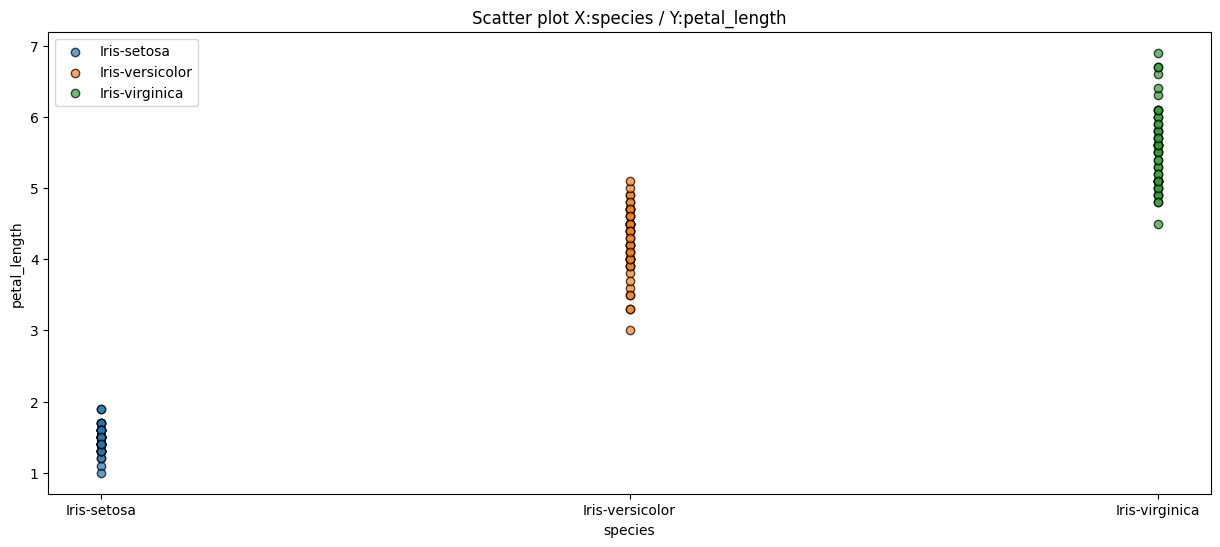

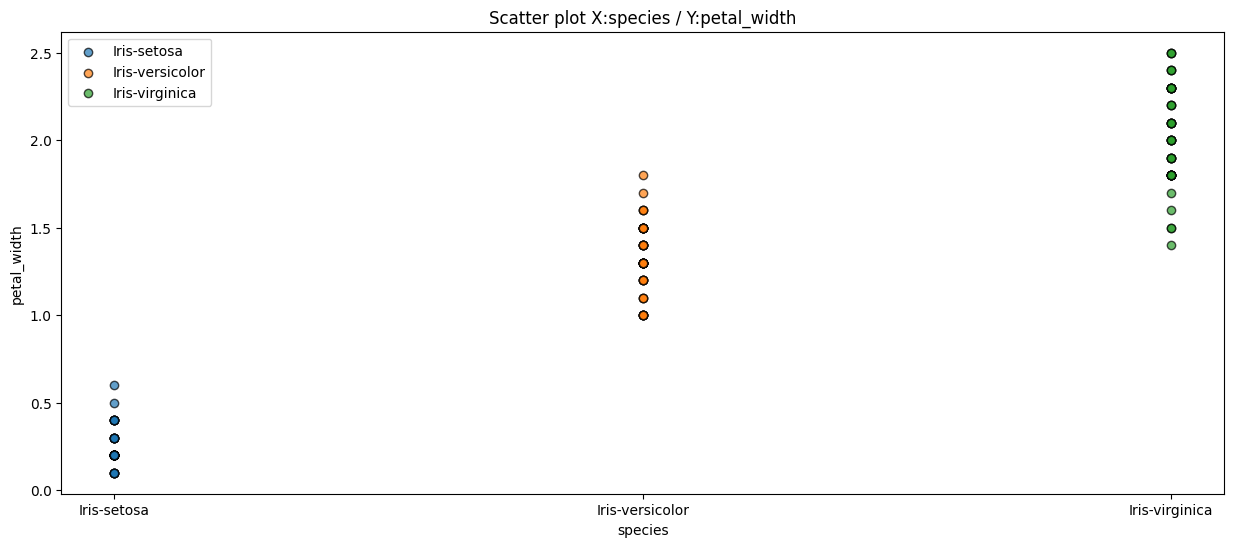

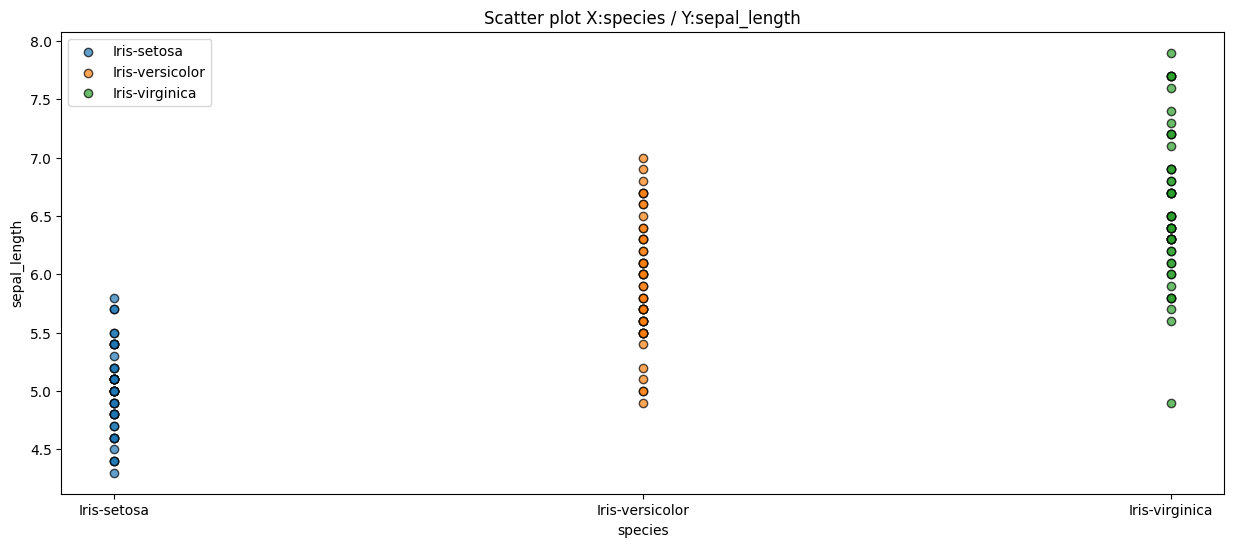

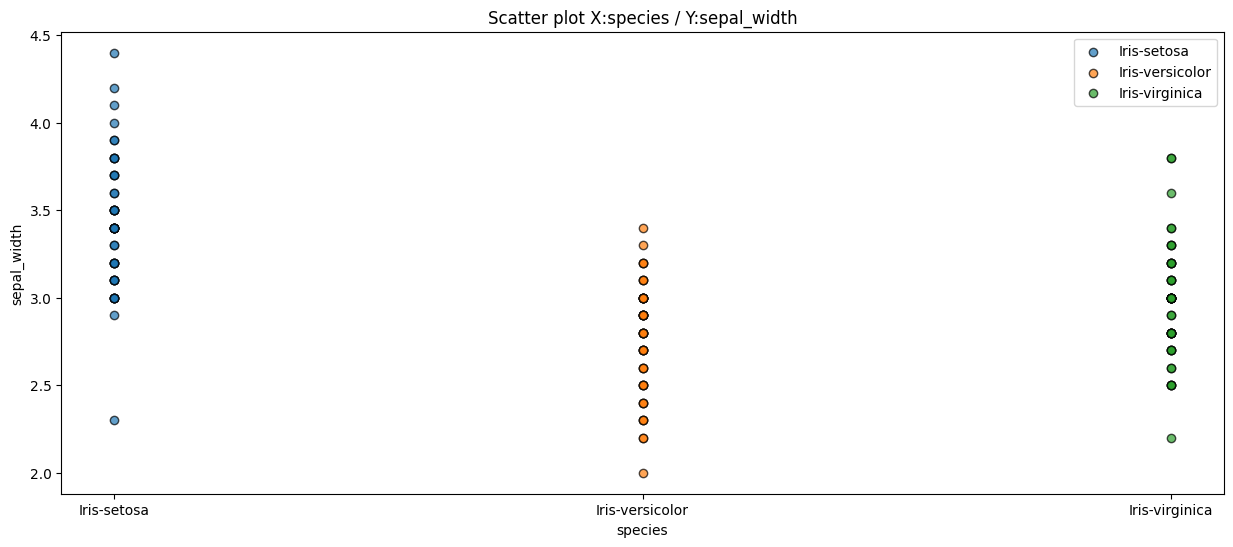

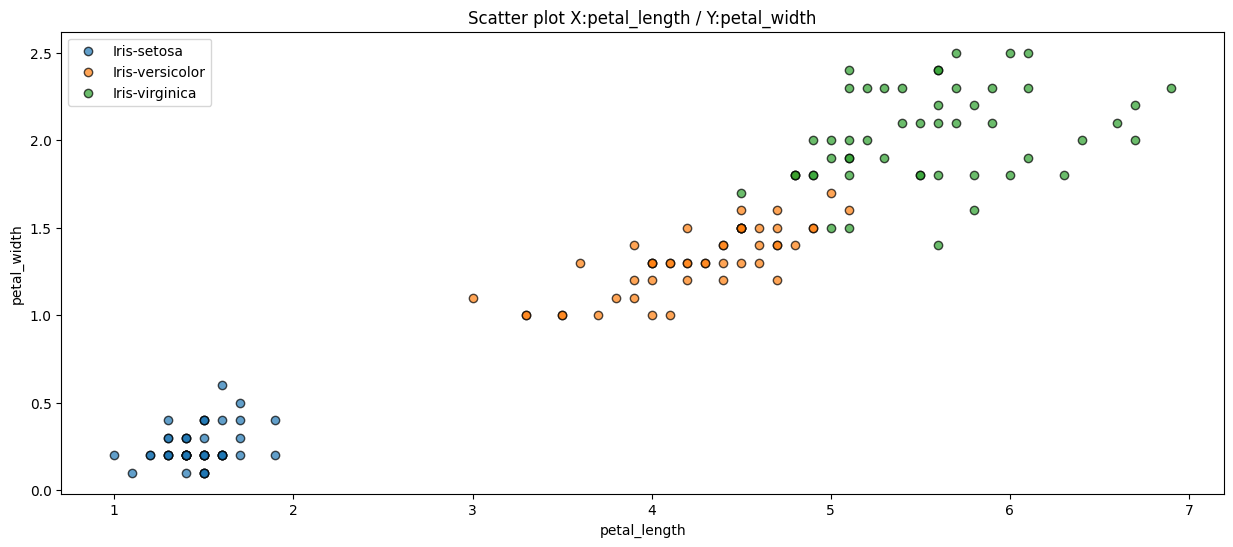

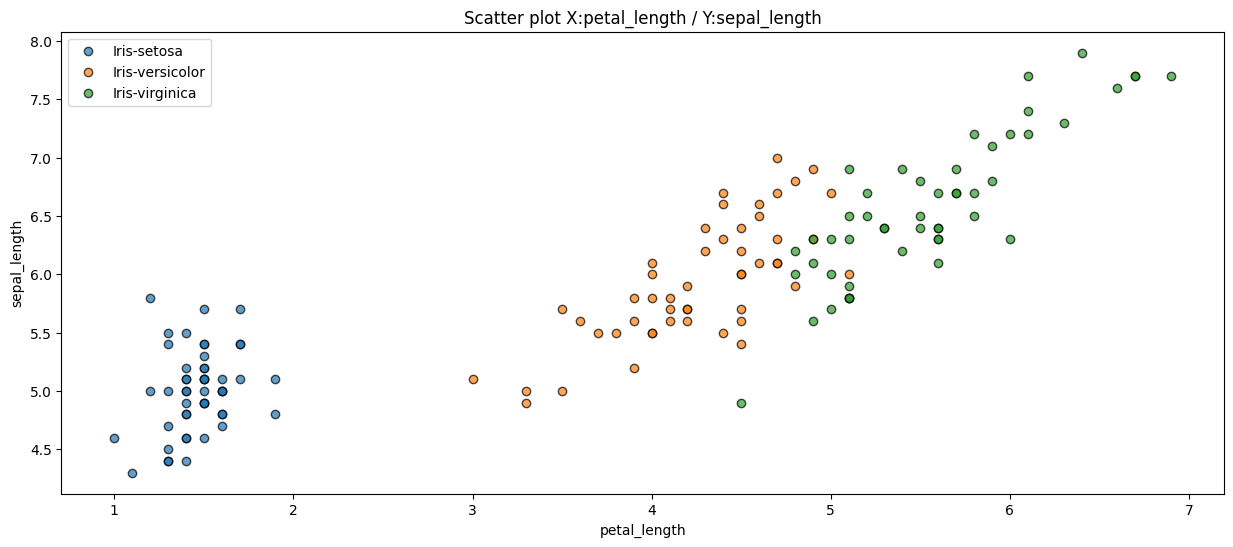

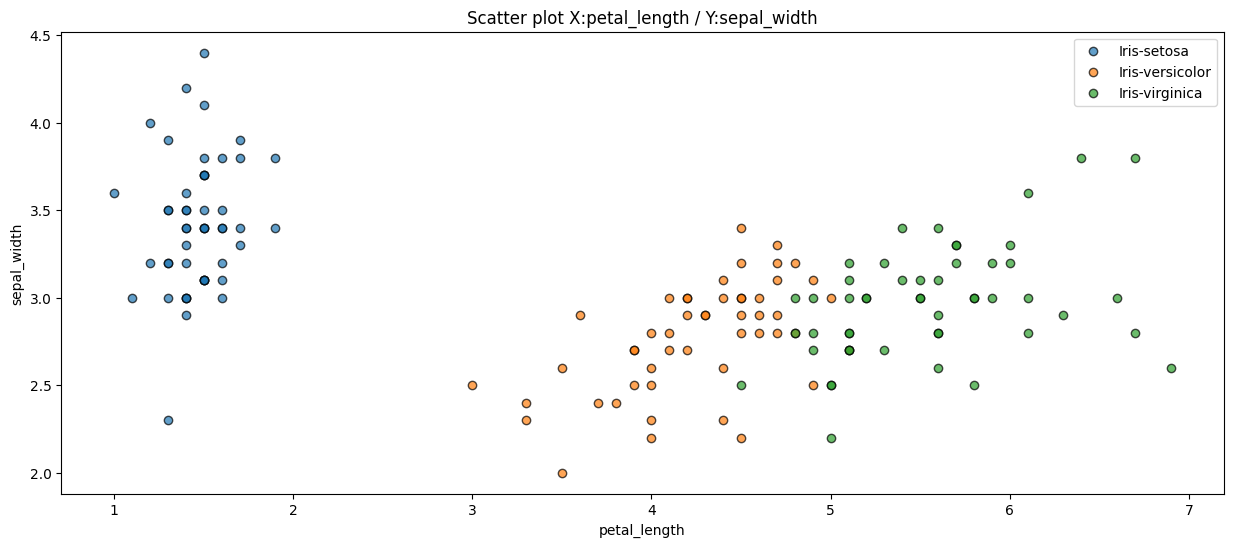

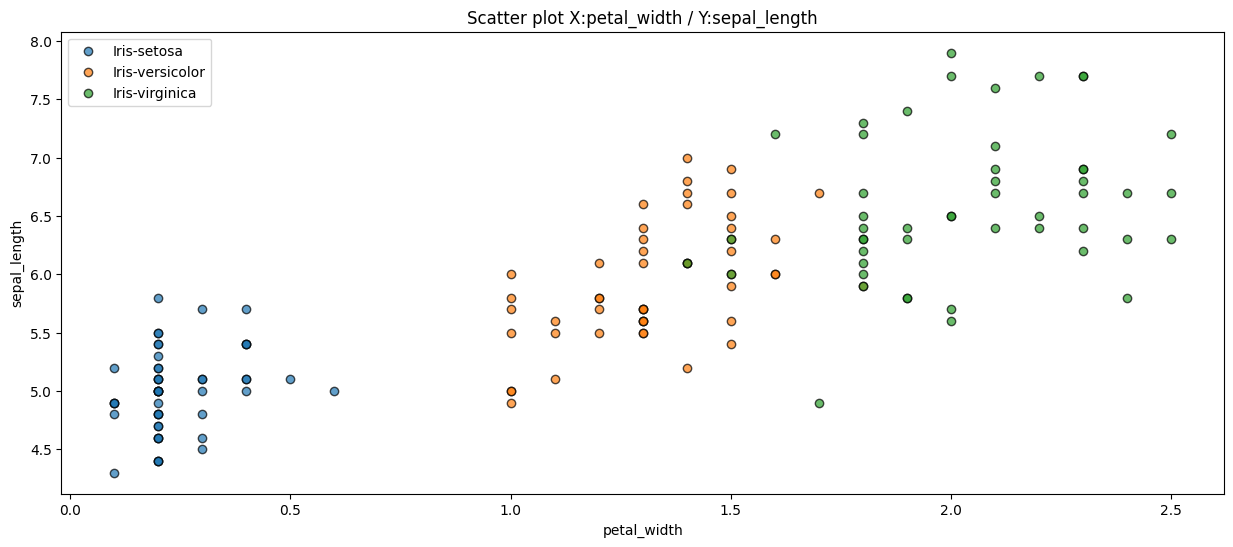

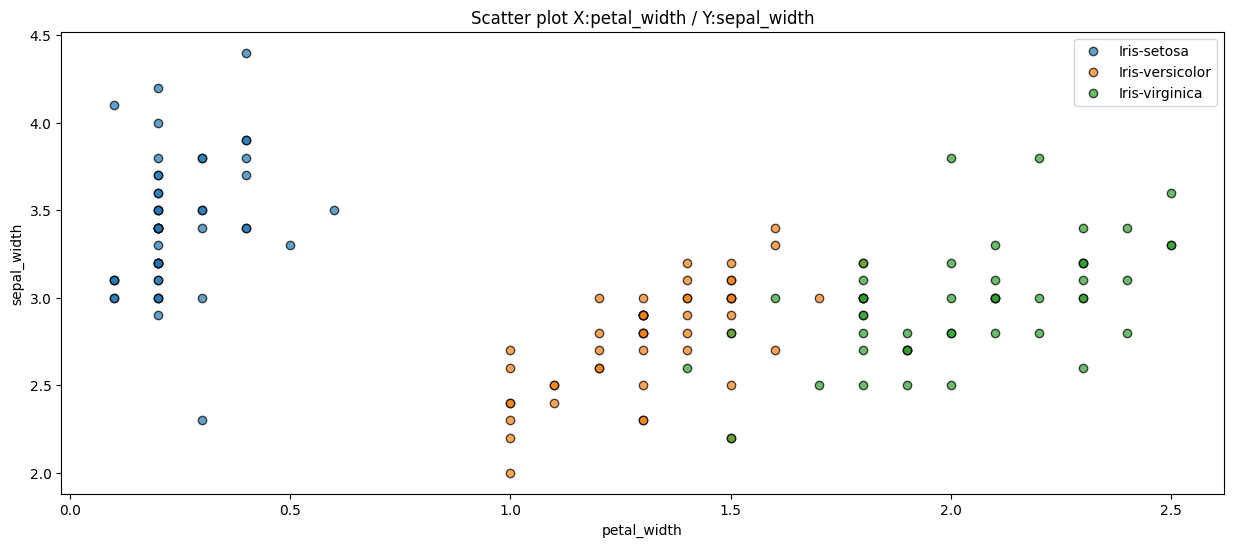

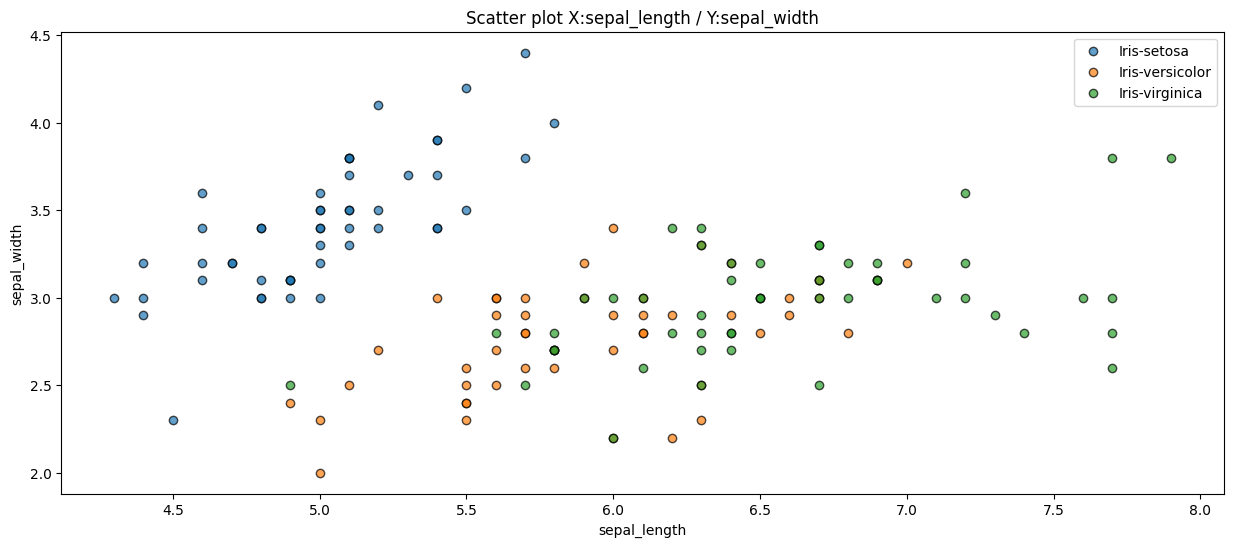

In [40]:
comb = combinations(["species", "petal_length", "petal_width", "sepal_length", "sepal_width"], 2)
comb_list = [list(i) for i in comb]

for col in comb_list:
    Scatterplot(col[0], col[1])

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**DROPPING AND REFINING THE CODE**

In [43]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
species_encoding = df.groupby('species').agg({'sepal_length': 'mean'}).to_dict()
df['species_encoded'] = round(df['species'].map(species_encoding['sepal_length']), 1)
df.species_encoded.unique()

array([5. , 5.9, 6.6])

In [48]:
df.drop(['species'],axis=1, inplace=True)

<Axes: >

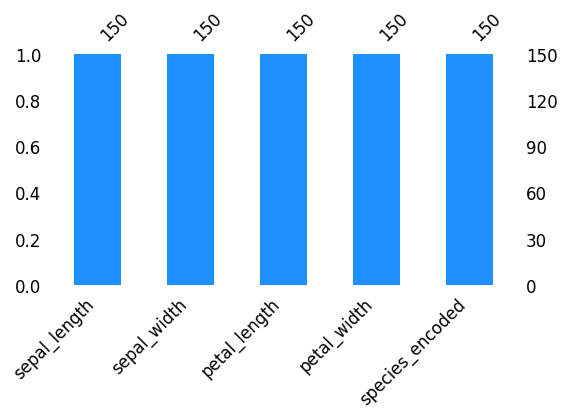

In [49]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(6,3), fontsize=12)

<Axes: >

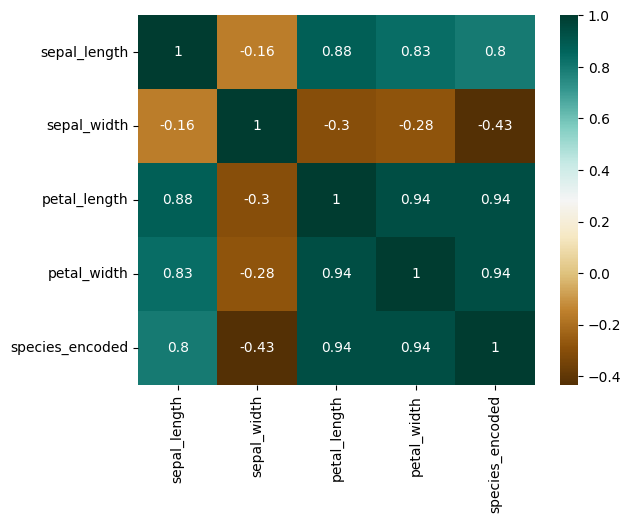

In [50]:
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="BrBG")

In [51]:
X = df.drop(['species_encoded'], axis=1)
y = df['species_encoded']

In [52]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y.head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: species_encoded, dtype: float64

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state= 32)

**LINEAR REGRESSION**

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
print('Mean Squared Error (Linear Regression - Test):',   mean_squared_error(y_test, lr_pred_test))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))

Mean Squared Error (Linear Regression - Test): 0.02146739786178181
Mean Absolute Error  (Linear Regression - Test):  0.11699085779863634
R2 score (Linear Regression - Train):  0.9502602757370918
R2 Score (Linear Regression - Test): 0.9521351218243438


**RANDOM FOREST REGRESSION**

In [56]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)
rf_pred_train = rfg.predict(X_train)
rf_pred_test = rfg.predict(X_test)
print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, rf_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, rf_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,rf_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,rf_pred_test))

Mean Squared Error (Random Forest - Test): 0.006925333333333059
Mean Absolute Error  (Random Forest - Test):  0.028000000000001565
R2 score (Random Forest - Train):  0.9921114690944416
R2 Score (Random Forest - Test): 0.9845589000371615


**DECISION TREE**

In [57]:
dt = DecisionTreeRegressor(max_depth=10,random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_test))

Mean Squared Error (Decision Tree - Test): 5.075005156921843e-30
Mean Absolute Error  (Decision Tree - Test):  1.6283271027835629e-15
R2 score (Decision Tree - Train):  1.0
R2 Score (Decision Tree - Test): 1.0
